# Распознование многоугольника

Промежуточные шаги работы алгоритма.


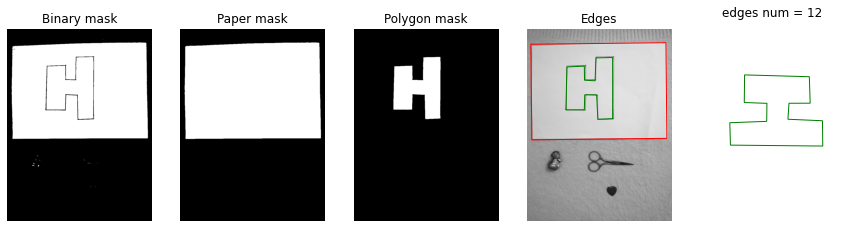

На одной из фотографий вместо многоугольника находится шум.


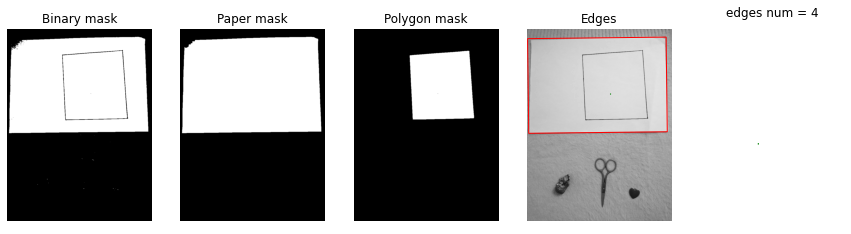

In [1]:
from intelligent_placer_lib import visualization
print("Промежуточные шаги работы алгоритма.")
visualization.detect_polygon_and_show_steps('input/36.jpg')
print("На одной из фотографий вместо многоугольника находится шум.")
visualization.detect_polygon_and_show_steps('input/37.jpg')

# Распознование предметов

Исходное изображение


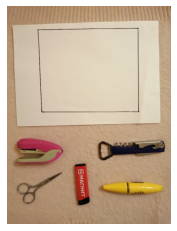

Вычли фотографию фона


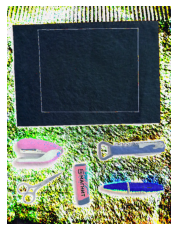

Убрали пиксели с высокой интенсивностью


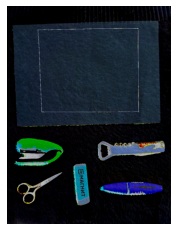

Получили маску для каждого rgb слоя, бинаризовав по порогу 100. Сложили все слои, таким образом получив маску предметов на изображении. Далее с маски убран лист, его координаты известны из распознавания многоугольника.


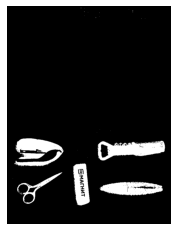

С помощью анализа компонент связности нашли области с достаточно большой площадью, получив маску для каждого предмета по отдельности.


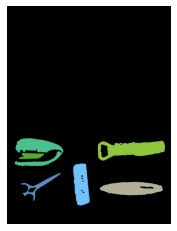

In [2]:
from intelligent_placer_lib import visualization
from intelligent_placer_lib import detect_polygon
path_to_image = 'input/27.jpg'
paper, _, _ = detect_polygon.detect_polygon(path_to_image)
visualization.get_items_masks(path_to_image, paper)

Далее можно определить предмет, расположенный в многоугольнике по совокупности параметров: длинна и ширина, цвет, площадь.   

# Размещение предметов  
### Алгоритм размещения
Для каждого предмета заранее в коде программы указывается многоугольник, описывающий его, а так же возможные варианты поворота. Они указываются вручную, так как каждый предмет имеет свою симметрию, которую стоит учитывать.  
Далее происходит перебор по всем возможным конфигурациям предмета для каждого из углов многоугольника с попыткой размещения следующим образом:  
1. Определяем систему координат так чтобы ось x совпадала с одной из сторон, а угол между осью y и второй стороной была меньше 90 градусов.
2. Находим преобразование, которое переводит найденные оси в начало координат и применияем его ко всему многоугольнику.
3. В результате одна из сторон многоугольника, ограничивающего предмет, будет находиться на стороне многоугольника с изображения. При этом скорее всего предмет не окажется полностью внутри многоугольника и его будет необходимо сдвинуть вправо. 

Пока ограничимся выпуклыми многоугольниками и считаем что предмет находится внутри если внутри находятся все точки  ограничевающего его многоугольника.   
Для того чтобы проверить, находится ли точка внутри или снаружи, посчитаем число пересечений луча, исходящего из нее в направлении оси х. Если оно нечетно, то точка находится внутри. Если точка находится вне, то длинна этого луча, до пересечения с многоугольником, и есть расстояние на которое необходимо сдвинуть предмет. При этом нужно учитывать ситуации когда точка находится на стороне или близка к ней. Для этого воспользуемся тем что косое произведение равно нулю если вектора коллинеарны. Косое произведение так же помогает определить с какой стороны от прямой находится точка.

Ниже представлен перебор различных вариантов размещения предмета внутри многоугольника.  
Сначала многоугольник распологается так, чтобы одна из его сторон начиналась в начале координат. Затем предмет сдвигается вправо, пока не окажется за ближайшей в этом направлении стороной.  Черным  обозначено начальное положение предмета, красным - сдвинутое.   

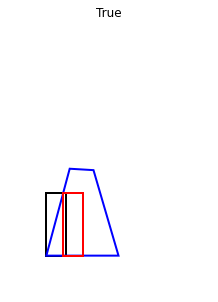

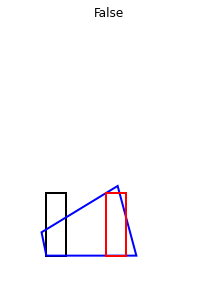

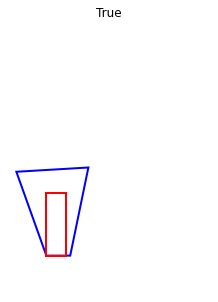

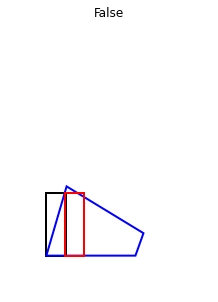

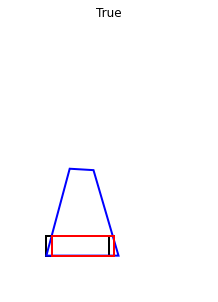

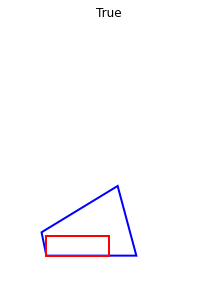

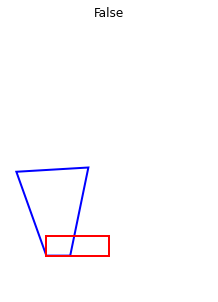

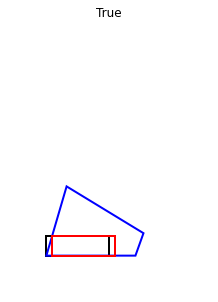

In [3]:
from intelligent_placer_lib import detect_polygon, visualization
_, _, poly = detect_polygon.detect_polygon('input/20.jpg')
visualization.variants(poly, 'lighter')

Получим новый многоугольник, убрав из исходного занятую предметом площадь. При этом если получим несколько вариантов - то выберем тот, у которого наибольшая площадь.  
Ниже представленн результат для предыдущего случая. Черным обозначен полученный многоугольник.

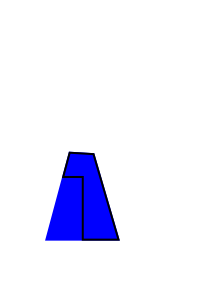

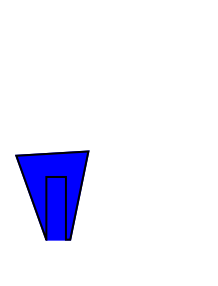

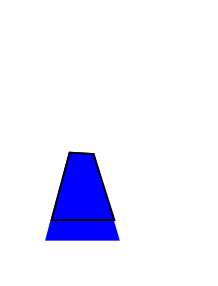

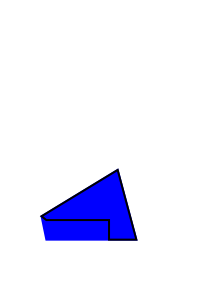

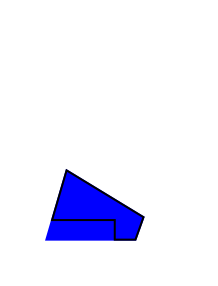

In [4]:
from intelligent_placer_lib import detect_polygon, visualization
_, _, poly = detect_polygon.detect_polygon('input/20.jpg')
visualization.next_poly_variants(poly, 'lighter')

Теперь из представленных вариантов выберем один. Будем действовать, исходя из двух соображений:
1. Площадь нового многоугольника должна быть как можно больше.
2. Многоугольник должет быть максимально приближен к выпуклому.   

Так например, в приведенных выше вариантах площадь второго многоугольника наибольшая, однако места для размещения чего-либо в нем остается мало.  
Далее приведены варианты, отобранные алгоритмом как наилучшие.

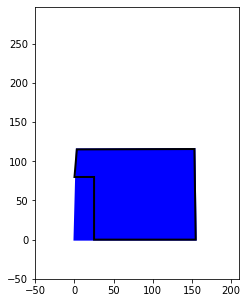

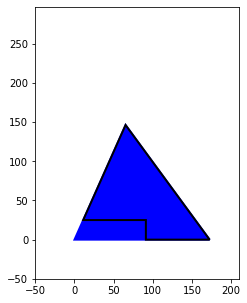

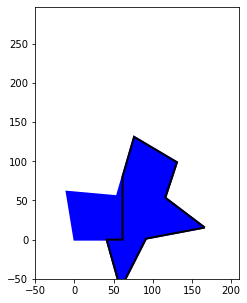

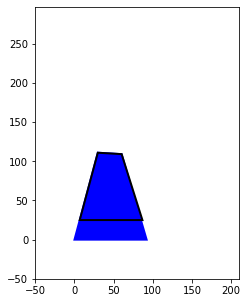

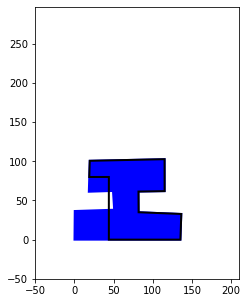

In [5]:
from intelligent_placer_lib import detect_polygon, visualization
filenames = [1, 8, 15, 16, 20, 34]
for name in filenames:
    path_to_image = 'input/' + str(name) + '.jpg'
    paper, matrix, poly = detect_polygon.detect_polygon(path_to_image)
    visualization.result(poly, 'lighter')

## Примеры работы программы

7: Программа компактно укладывает степлер и ленту.
Найденные предметы: ['stapler', 'tape']
Предметы на изображении: ['stapler', 'tape']
Ответ: True
Правильный ответ: True


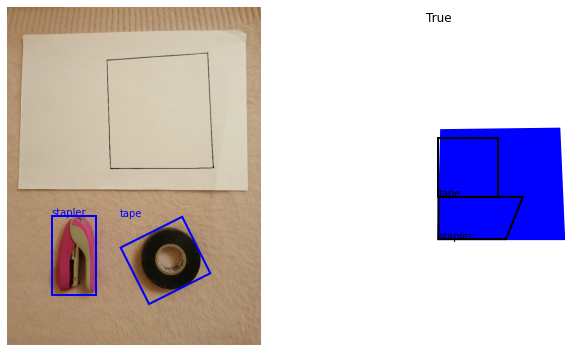

5: Тут размещение не настолько хорошее
Найденные предметы: ['stapler', 'tape', 'lighter']
Предметы на изображении: ['stapler', 'tape', 'lighter']
Ответ: True
Правильный ответ: True


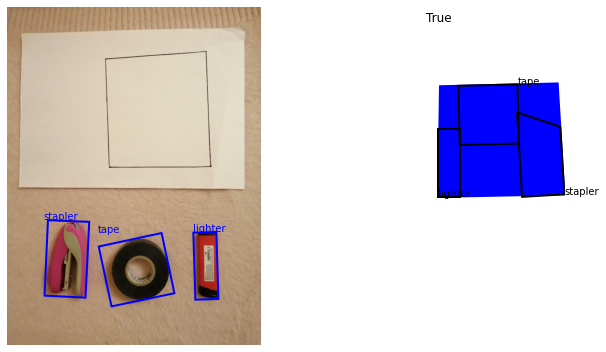

14: Пример успешной укладки


C:\Users\Comp.000\Desktop\Intelligent_Placer\intelligent_placer_lib\decide.py:39: RuntimeWarning: overflow encountered in ubyte_scalars
  red_area += b[i][j] > r[i][j] and b[i][j] > g[i][j] and b[i][j] - r[i][j] > (g[i][j] - r[i][j]) * 2


Найденные предметы: ['tool', 'scissors', 'toy', 'heart']
Предметы на изображении: ['heart', 'toy', 'scissors', 'tool']
Ответ: True
Правильный ответ: True


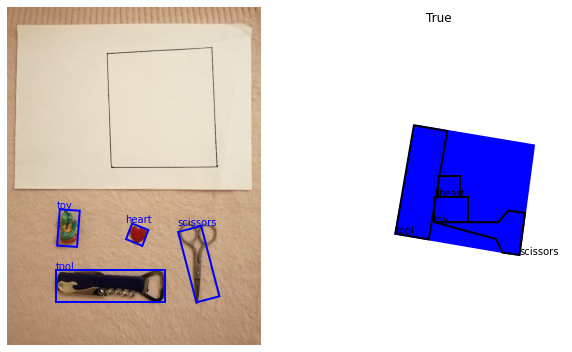

16: Программа плохо справляется с невыпуклыми многоугольниками
Найденные предметы: ['yellow_scissors']
Предметы на изображении: ['yellow_scissors']
Ответ: False
Правильный ответ: True


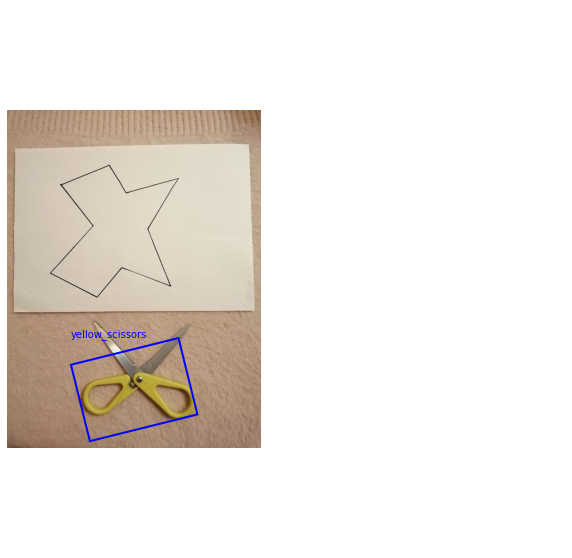

21: Программа плохо справляется с невыпуклыми многоугольниками
Найденные предметы: ['tool', 'mascara']
Предметы на изображении: ['mascara', 'tool']
Ответ: True
Правильный ответ: False


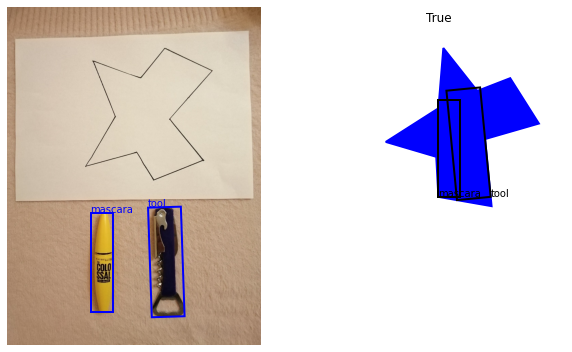

36: Программа плохо справляется с невыпуклыми многоугольниками
Найденные предметы: ['scissors', 'toy', 'heart']
Предметы на изображении: ['heart', 'toy', 'scissors']
Ответ: True
Правильный ответ: True


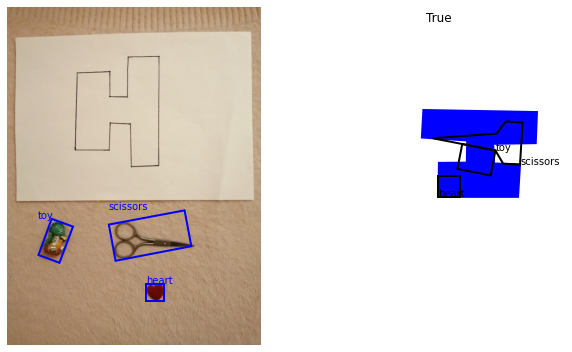

22: Пример успешной укладки для невыпуклого многоугольника
Найденные предметы: ['mascara', 'lighter']
Предметы на изображении: ['lighter', 'mascara']
Ответ: True
Правильный ответ: True


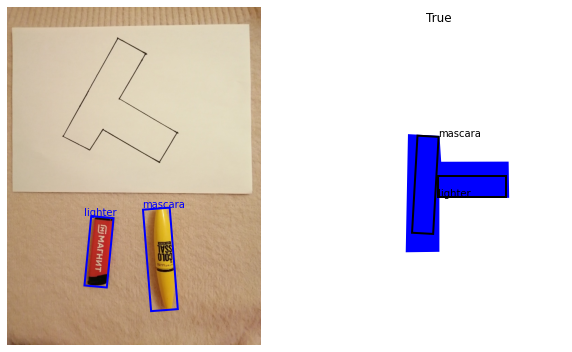

25: Не получается разместить степлер, хотя места еще достаточно
Найденные предметы: ['scissors', 'stapler', 'heart']
Предметы на изображении: ['stapler', 'scissors', 'heart']
Ответ: False
Правильный ответ: True


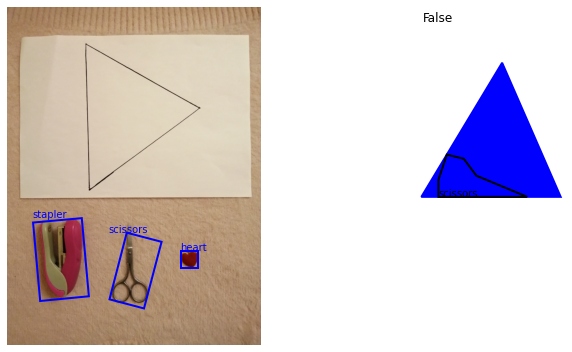

26: А тут получилось
Найденные предметы: ['scissors', 'stapler', 'tape']
Предметы на изображении: ['stapler', 'scissors', 'tape']
Ответ: False
Правильный ответ: False


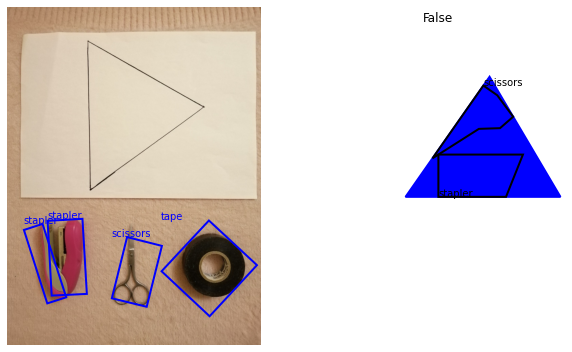

27: Упаковка досточно плотная, но видно, что предметы накладываются друг на друга
Найденные предметы: ['tool', 'mascara', 'scissors', 'stapler', 'lighter']
Предметы на изображении: ['lighter', 'scissors', 'stapler', 'tool', 'mascara']
Ответ: True
Правильный ответ: True


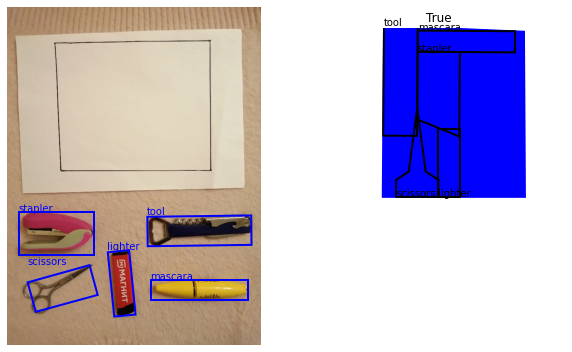

30: Упаковка была бы плотнее если поместить сердце в свободный нижний левый угол. однако эта часть многоугольника была отброшена на предыдущих шагах. К тому же вместо исходного прямоугольника рассматривается зеркально отраженный
Найденные предметы: ['mascara', 'lighter', 'heart']
Предметы на изображении: ['lighter', 'heart', 'mascara']
Ответ: True
Правильный ответ: True


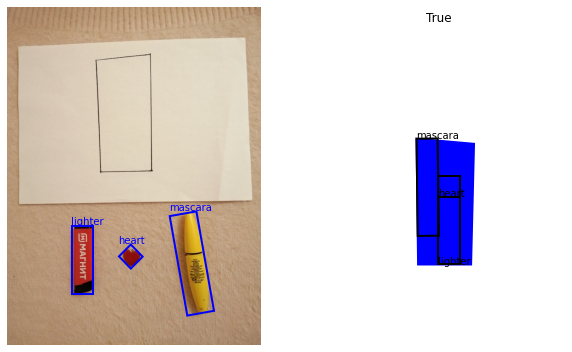

In [6]:
from intelligent_placer_lib import detect_polygon, visualization, detect_item
import matplotlib.pyplot as plt


def read_table():
    result = {}
    table = open("input.csv", "r")
    lines = table.readlines()
    table.close()
    for line in lines:
        line = line.replace(" ", "")
        line = line.replace("\n", "")
        res = line.split(',')
        items_on_image = []
        for i in range(2, len(res)):
            items_on_image.append(res[i])
            result[res[0]] = (res[1], items_on_image)
    return result


table = read_table()
examples = {7: 'Программа компактно укладывает степлер и ленту.',
            5: 'Тут размещение не настолько хорошее',
            14:'Пример успешной укладки',
            16:'Программа плохо справляется с невыпуклыми многоугольниками',
            21:'Программа плохо справляется с невыпуклыми многоугольниками',
            36:'Программа плохо справляется с невыпуклыми многоугольниками',
            22:'Пример успешной укладки для невыпуклого многоугольника',
            25:'Не получается разместить степлер, хотя места еще достаточно',
            26:'А тут получилось',
            27:'Упаковка досточно плотная, но видно, что предметы накладываются друг на друга',
            30:'Упаковка была бы плотнее если поместить сердце в свободный нижний левый угол. ' +
                'однако эта часть многоугольника была отброшена на предыдущих шагах. К тому же вместо исходного прямоугольника рассматривается зеркально отраженный'}
for name, comment in examples.items():
    path_to_image = 'input/' + str(name) + '.jpg'
    print(str(name) + ': ' + comment)
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    [axi.set_axis_off() for axi in ax.ravel()]
    paper, matrix, poly = detect_polygon.detect_polygon(path_to_image)
    items = visualization.detect_item(path_to_image, paper, matrix, ax[0])
    print('Найденные предметы: ' + str(items))
    print('Предметы на изображении: ' + str(table[str(name)][1]))
    print('Ответ: ' + str(visualization.place_items(poly, items, ax[1])))
    print('Правильный ответ: ' + str(table[str(name)][0]))
    plt.show()

## Оценка результатов

In [7]:
from intelligent_placer_lib import detect_polygon, detect_item, place_item

table = read_table()
correct_answers = 0
found_items = 0
not_found_items = 0
not_on_image = 0
all_items = 0
img_num = 37
for i in range(1, img_num + 1):
    path_to_image = 'input/' + str(i) + '.jpg'
    paper, matrix, poly = detect_polygon.detect_polygon(path_to_image)
    items = detect_item.detect_item(path_to_image, paper, matrix)
    ans = str(place_item.place_items(poly, items))
    items_on_image = table[str(i)][1]
    right_ans = table[str(i)][0]
    if ans.__eq__(right_ans):
        correct_answers += 1
    for item in items:
        if item in items_on_image:
            found_items += 1
        else:
            not_on_image += 1
    for item in items_on_image:
        if item not in items:
            not_found_items += 1
    all_items += len(items_on_image)
print('Правильных ответов ' + str(correct_answers) + ' из ' + str(img_num))
print('Процент правильных ответов: ' + str(round(correct_answers / img_num * 100)) + '%')
print('Распознаных предметов: '+ str(found_items))
print('Нераспознаных предметов: '+ str(not_found_items))
print('Найдено предметов, которых нет на изображении: '+ str(not_on_image))
print('Всего предметов: '+ str(all_items))

Правильных ответов 30 из 37
Процент правильных ответов: 81%
Распознаных предметов: 78
Нераспознаных предметов: 0
Найдено предметов, которых нет на изображении: 0
Всего предметов: 78


## Сравнение результатов работы программы с ожидаемыми

In [8]:
from intelligent_placer_lib import intelligent_placer
for i in range(1, img_num + 1):
    path_to_image = 'input/' + str(i) + '.jpg'
    right_ans = table[str(i)][0]
    ans = str(intelligent_placer.check_image(path_to_image))
    res = ans.__eq__(right_ans)
    print( f"{i:>2}: {res}")

 1: True
 2: True
 3: False
 4: True
 5: True
 6: True
 7: True
 8: True
 9: True
10: True
11: True
12: True
13: True
14: True
15: True
16: False
17: True
18: True
19: True
20: False
21: False
22: True
23: True
24: False
25: False
26: True
27: True
28: True
29: True
30: True
31: True
32: True
33: True
34: True
35: True
36: True
37: False
